In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


# Two-hump camel function definition
def camel(x, y):
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2


# Gradient of the two-hump camel function
def gradient_camel(params):
    x, y = params
    dx = 4 * x - 4.2 * x**3 + x**5 + y
    dy = x + 2 * y
    return np.array([dx, dy])


# Optimizer functions
def gradient_descent(params, grads, lr):
    return params - lr * grads


def rmsprop(params, grads, cache, lr=0.01, beta=0.9, epsilon=1e-8):
    cache = beta * cache + (1 - beta) * (grads**2)
    params = params - lr * grads / (np.sqrt(cache) + epsilon)
    return params, cache


def adam(params, grads, m, v, t, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grads
    v = beta2 * v + (1 - beta2) * (grads**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    params = params - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return params, m, v


# Function to plot the loss surface
def plot_surface(ax):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = camel(X, Y)
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6, edgecolor="none")
    return ax


# Function to run the optimizer and animate
def animate_optimizers(
    optimizer="Gradient Descent",
    learning_rate=0.1,
    decay_rate=0.9,
    params_X=1.5,
    params_Y=1.5,
):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax = plot_surface(ax)

    # Initial parameters
    params = np.array([params_X, params_Y])

    # Path lists for storing points to animate
    path_x, path_y, path_z = [], [], []

    # Initial values for RMSProp and Adam
    cache_rmsprop = np.zeros_like(params)
    m_adam = np.zeros_like(params)
    v_adam = np.zeros_like(params)

    # Number of iterations
    num_iterations = 50

    for t in range(1, num_iterations + 1):
        # Compute the gradient
        grads = gradient_camel(params)

        # Update parameters based on optimizer choice
        if optimizer == "Gradient Descent":
            params = gradient_descent(params, grads, learning_rate)
        elif optimizer == "RMSProp":
            params, cache_rmsprop = rmsprop(
                params, grads, cache_rmsprop, lr=learning_rate, beta=decay_rate
            )
        elif optimizer == "Adam":
            params, m_adam, v_adam = adam(
                params,
                grads,
                m_adam,
                v_adam,
                t,
                lr=learning_rate,
                beta1=decay_rate,
                beta2=0.999,
            )

        # Store the path
        path_x.append(params[0])
        path_y.append(params[1])
        path_z.append(camel(params[0], params[1]))

    # Update the plot
    ax.plot(path_x, path_y, path_z, "ro-", markersize=5)

    plt.show()


# Interactive controls with ipywidgets
def run_interactive():
    optimizer_widget = widgets.Dropdown(
        options=["Gradient Descent", "RMSProp", "Adam"],
        value="Gradient Descent",
        description="Optimizer:",
    )

    learning_rate_widget = widgets.FloatSlider(
        value=0.1, min=0.001, max=1.0, step=0.01, description="Learning Rate:"
    )

    decay_rate_widget = widgets.FloatSlider(
        value=0.9, min=0.5, max=1.0, step=0.01, description="Decay Rate:"
    )
    init_param_X_widget = widgets.FloatSlider(
        value=-2, min=-2, max=2, step=0.01, description="Initial X"
    )
    init_param_Y_widget = widgets.FloatSlider(
        value=-2, min=-2, max=2, step=0.01, description="Initial Y"
    )

    ui = widgets.VBox(
        [
            optimizer_widget,
            learning_rate_widget,
            decay_rate_widget,
            init_param_X_widget,
            init_param_Y_widget,
        ]
    )

    out = widgets.interactive_output(
        animate_optimizers,
        {
            "optimizer": optimizer_widget,
            "learning_rate": learning_rate_widget,
            "decay_rate": decay_rate_widget,
            "params_X": init_param_X_widget,
            "params_Y": init_param_Y_widget,
        },
    )

    display(ui, out)


# Run the interactive plot
run_interactive()

Output()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display
import time
from threading import Thread

# Two-hump camel function definition
def camel(x, y):
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2

# Gradient of the two-hump camel function
def gradient_camel(params):
    x, y = params
    dx = 4 * x - 4.2 * x**3 + x**5 + y
    dy = x + 2 * y
    return np.array([dx, dy])

# Optimizer functions
def gradient_descent(params, grads, lr):
    return params - lr * grads

# Function to plot the loss surface
def plot_surface(ax):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = camel(X, Y)
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')
    return ax

# Function to run the optimizer and animate using FuncAnimation
def animate_optimizer_auto(learning_rate=0.1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax = plot_surface(ax)

    # Initial parameters
    params = np.array([1.5, 1.5])

    # Path lists for storing points to animate
    path_x, path_y, path_z = [], [], []

    # Number of iterations
    num_iterations = 50

    def update(frame):
        nonlocal params

        # Compute the gradient
        grads = gradient_camel(params)

        # Update parameters using gradient descent
        params = gradient_descent(params, grads, learning_rate)

        # Store the path
        path_x.append(params[0])
        path_y.append(params[1])
        path_z.append(camel(params[0], params[1]))

        # Update the plot
        ax.plot(path_x, path_y, path_z, 'ro-', markersize=5)

    # Use FuncAnimation to automatically update the plot
    ani = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=False)

    plt.show()

# Create a slider for learning rate
learning_rate_slider = widgets.FloatSlider(
    value=0.1,
    min=0.001,
    max=1.0,
    step=0.01,
    description='Learning Rate:'
)

# Display the widget
display(learning_rate_slider)

# Automatic sliding function to change the slider value over time
def auto_slide_widget(widget, start=0.1, end=1.0, step=0.01, interval=0.2):
    while widget.value < end:
        widget.value += step
        time.sleep(interval)
        if widget.value >= end:
            widget.value = start  # Reset to the beginning
            time.sleep(interval)

# Run the automatic sliding in a separate thread
def start_auto_slide():
    thread = Thread(target=auto_slide_widget, args=(learning_rate_slider, 0.1, 1.0, 0.01, 0.1))
    thread.start()

# Run the optimizer animation linked to the current slider value
def run_optimization():
    def update_plot(change):
        # Rerun the optimizer with the updated learning rate from the slider
        animate_optimizer_auto(learning_rate=learning_rate_slider.value)

    # Trigger animation update whenever the slider value changes
    learning_rate_slider.observe(update_plot, names='value')

# Start automatic sliding and optimization
start_auto_slide()
run_optimization()


FloatSlider(value=0.1, description='Learning Rate:', max=1.0, min=0.001, step=0.01)

/media/halean/3TB_1/greenglobal_llamaindex_env/lib/python3.10/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
Exception in thread Thread-6 (auto_slide_widget):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/media/halean/3TB_1/greenglobal_llamaindex_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_87677/2295813115.py", line 87, in auto_slide_widget
  File "/media/halean/3TB_1/greenglobal_llamaindex_env/lib/python3.10/site-packages/traitlets/traitlets.py", li

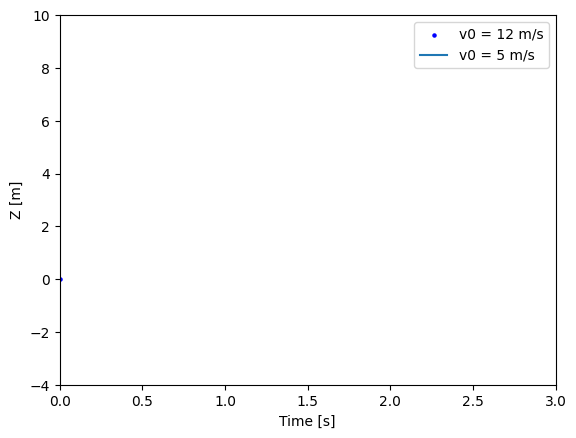

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [4]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [5]:
import ipywidgets as widgets
x0_widget = widgets.FloatSlider(value=2.0, min=-2.0, max=2.0, step=0.1, description='x0:')
y0_widget = widgets.FloatSlider(value=2.0, min=-2.0, max=2.0, step=0.1, description='y0:')
v_widget = widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='Initial Velocity:')
# create interactive iwidget# Create interactive iwidget
ui = widgets.VBox([x0_widget, y0_widget, v_widget])

# Define the output function
out = widgets.Output()



# Display the UI
display(ui)

<Figure size 640x480 with 0 Axes>

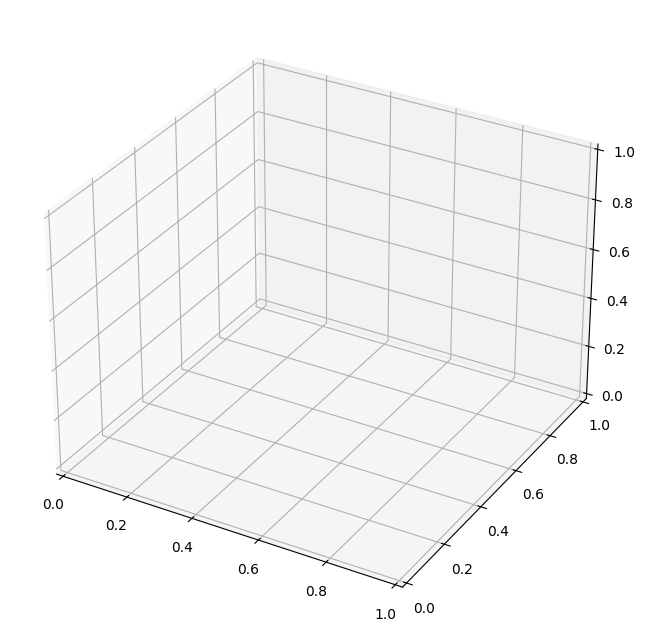

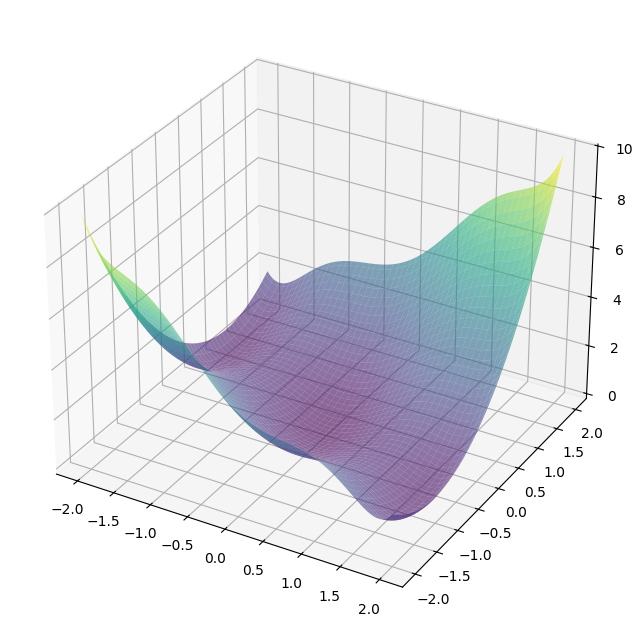

Output()

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits
import numpy as np
from matplotlib import cm
from numpy.typing import NDArray


# Define the surface function f(x, y)
def draw_surface(
    x_limits: NDArray[np.float64],
    y_limits: NDArray[np.float64],
    surface_fn: callable,
) -> mpl_toolkits.mplot3d.axes3d.Axes3D:
    X, Y = np.meshgrid(x, y)
    Z = surface_fn((X, Y))
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the loss surface
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")
    return ax


x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
k = 0.01


def plane(params):
    x, y = params
    # Example: a simple inclined plane
    return 0.1 * x + 0.05 * y


# Two-hump camel function definition
def camel(params):
    x, y = params
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2


# Gradient of the two-hump camel function
def gradient_camel(params):
    x, y = params
    dx = 4 * x - 4.2 * x**3 + x**5 + y
    dy = x + 2 * y
    return np.array([dx, dy])


# Optimizer functions
def gradient_descent(params, grads, lr):
    return params - lr * grads


# Compute partial derivatives numerically
def plane_gradient(params, h=1e-5):
    x, y = params
    return [0.1, 0.05]


surface_fn = camel
ax = draw_surface(x, y, surface_fn)
x_0, y_0 = 2, 2
g = np.array([0, 0, -9.8])
k = 0.1

import ipywidgets as widgets

def calculate_a_at_xy(x, y, surface_fn, surface_gradient_fn, v):
    g_force = g
    n = np.array([*surface_gradient_fn((x, y)), -1])
    n = n / np.linalg.norm(n)
    g_parallel = g_force - np.dot(n, g_force) * n
    if np.linalg.norm(g_parallel)==0:
        norm_parallel = np.array([0, 0, 0])
    else:
        norm_parallel = g_parallel / np.linalg.norm(g_parallel)
    # normal form of n
    g_tangent = g_parallel - g_force
    friction = np.linalg.norm(g_tangent) * k
    if np.linalg.norm(v) < 0.001:
        friction_force = -friction * norm_parallel
        if np.dot(g_parallel + friction_force, g_parallel)<0:
            friction_force = 0 * friction_force
    else:
        norm_v = v / np.linalg.norm(v)
        friction_force = -friction * norm_v

    a = g_parallel + friction_force
    return a


v = np.array([0.00, 0.00, 0.00])
iterations = 200
lr = 0.2


def run(x0, y0, surface_fn, surface_gradient_fn, v):
    a = calculate_a_at_xy(x0, y0, surface_fn, surface_gradient_fn, v)
    ax = draw_surface(np.linspace(-2,2,100), np.linspace(-2,2,100), surface_fn)
    for i in range(iterations):
        current_p = x0, y0
        next_p = current_p + v[0:2] * lr
        next_v = v + a * lr
        next_a = calculate_a_at_xy(
            *next_p, surface_fn, surface_gradient_fn, v
        )
        v = next_v
        current_p = next_p
        a = next_a
        ax.scatter3D(*next_p, surface_fn(next_p))


#use iwidget interactive for runimport ipywidgets as widgets
from IPython.display import display

# Create interactive widgets
x0_widget = widgets.FloatSlider(value=2.0, min=-2.0, max=2.0, step=0.1, description='x0:')
y0_widget = widgets.FloatSlider(value=2.0, min=-2.0, max=2.0, step=0.1, description='y0:')
v_widget = widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='Initial Velocity:')
# create interactive iwidget# Create interactive iwidget
ui = widgets.VBox([x0_widget, y0_widget, v_widget])

# Define the output function
out = widgets.Output()

def update_plot(x0, y0, v):
    with out:
        out.clear_output(wait=True)
        ax.clear()
        #draw_surface(x, y, surface_fn)
        run(x0, y0, camel, gradient_camel, np.array([v, v, 0.0]))

# Link the widgets to the update function
widgets.interactive(update_plot, x0=x0_widget, y0=y0_widget, v=v_widget)

# Display the UI
display(ui, out)

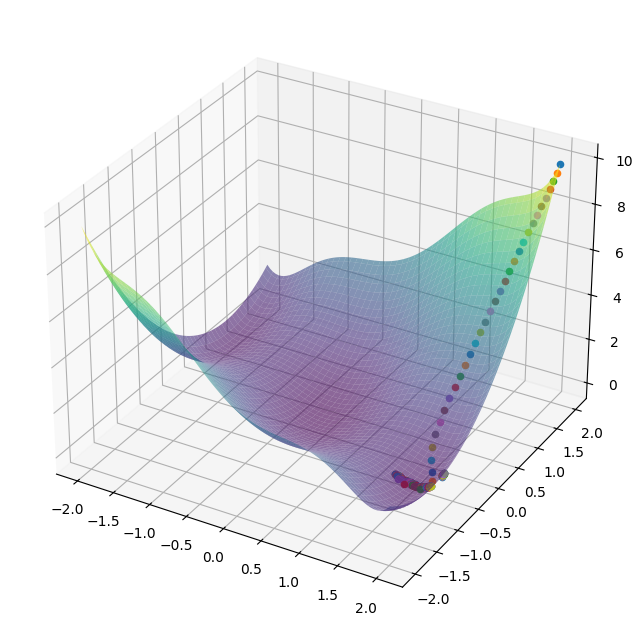

In [7]:
run(2,2, camel, gradient_camel, np.array([0,0,0]))